In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 7:  Linear Algebra Part 2

## Question 1

In a previous homework we computed the Lebesgue constants for a set of interpolation points.  Now we are going to directly relate this to ill-conditioning of a matrix.  For this question let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ respectively.

**(a)** (12 points) Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.  Note that this is not simply the Vandermonde matrix (but does involve it).  If you need to assume invertibility of a matrix then justify under what conditions that it is invertible.

**Answer**
A is a $m\times n$ matrix that maps n-vector of data at m-vector of sampled values $\mathcal{P(y_j)}$.

We generate Vandermonde matrix for x, $V_x$

$$V_x = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_n & x_n^2 & \cdots & x_n^{n-1}
\end{bmatrix}$$

We have $V_x \cdot \mathcal{P} = f(x)$ 

We generate Vandermonde matrix for y, $V_y$. We have $V_y \cdot \mathcal{P} = \mathcal{P}(y)$

Thus, $\mathcal{P} = V_x^{-1}\cdot f(x)$ and $V_y\cdot V_x^{-1}\cdot f(x) = \mathcal{P}(y)$

Since $V_y$ is $m\times n$ matrix, and $V_x$ is $n\times n$ matrix, they can multiply each other and produce a $m\times n$ matrix.

Here, we have the formula for matrix A: $A = V_y \times V_x^{-1}$

When Vandermonde matrix for x is a square matrix and $x_n$ are equispaced points from -1 to 1, it's invertible.

**End**

**(b)** (12 points) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

/Users/liang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in double_scalars


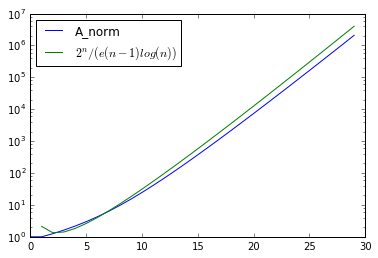

In [2]:
### INSERT CODE HERE
def calculate_A(m, n):
    """calculate matrix A by formula generated in question (a)
    
    Input: 
    -m: the number of rows 
    -n: the number of columns
    
    Output:
    -A: the matrix A
    """
    x = numpy.linspace(-1, 1, n)
    y = numpy.linspace(-1, 1, m)
    
    #generate Vandermonde matrix for x and y
    Vx = numpy.vander(x, n)
    Vy = numpy.vander(y, n)
    
    Vx_inv = numpy.linalg.inv(Vx)
    
    #using the formula we generate from last step to calculate A
    A = numpy.dot(Vy, Vx_inv)
    
    return A


A_norm = []
L_list = []

for n in xrange(1, 31):
    m = 2.0*n - 1.0
    A = calculate_A(m, n)
    inf_norm = numpy.linalg.norm(A, ord=numpy.inf)
    A_norm.append(inf_norm)
    
    L = 2.0**n/(numpy.exp(1) * (n-1.0) * numpy.log(n))
    L_list.append(L)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(A_norm, label = "A_norm")
axes.semilogy(L_list, label = "$2^n/(e(n-1)log(n))$")
axes.legend(loc=2)
plt.show()

**(c)** (12 points) For $n=1,2,\ldots,30$ and $m=2n-1$, what is the $\infty$-norm condition number $\kappa$ of the problem of interpolating the constant function 1?  Connect this result back to conditioning of the matrix, the order of the polynomial, and what this implies.

Hint:  Use the expression we found involving the Jacobian.

**Answer**

Because we know if $f$ is differentiable we can use the Jacobian $J(x)$ to evaluate the relative condition number as
$$
    \kappa = \frac{||J(x)||}{||f(x)|| ~/ ~||x||}.
$$

Let $\mathcal{F}(X) = A \cdot f(x) = \mathcal{P}(y)$

Thus, we have $J = \frac{\partial \mathcal{F}}{\partial f(x)} = A$

$$
    \kappa = \frac{||A||_\infty}{||\mathcal{F}||_\infty ~/ ~||f(x)||_\infty}.
$$

Since the problem is interpolating the constant function 1, the $||\mathcal{F}||_\infty = 1$ and $||f(x)||_\infty = 1$

We have $$\kappa = ||A||_\infty$$

**connect this result to conditioning of the matrix**

By defination, 
$$
    \kappa = sup\frac{||A(x + \delta) - Ax||}{||Ax||}\frac{x}{\delta} = sup\frac{||A\delta||}{\delta}\frac{x}{Ax} = ||A||\frac{||x||}{||Ax||} = ||A||_\infty  
$$

which is consistent with what we have for first question.

**connect to the order of polynomial**

The oder of the polynomial will influence the scale of matrix A. 

**what this implies**

The conditioning number of this problem is proportion to the infinity norm of the matrix, when the infinity norm of the matrix is large, and stable of problem is less.

**End**

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.

**(a)** (10 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

$$
    A = \begin{bmatrix}
        1 & 0 & 0\\
        0 & 1 & 0\\
        0 & 0 & 1
        \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}
$$

$$
    A = \begin{bmatrix}
        1 & 0 & 0\\
        2 & 1 & 0\\
        4 & 0 & 1
        \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 4 & 3
    \end{bmatrix}
$$

$$
    A = \begin{bmatrix}
        1 & 0 & 0\\
        2 & 1 & 0\\
        4 & 1 & 1
        \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}
$$




**(b)** (12 points) Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages beyond the `argmax` function and basic array constructors.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [6]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row

#collaborator Boxi Xia
def LU_factorization(A):
    """LU factorize the matrix A
    
    Input:
    -A: the square matrix A
    
    Output:
    -P: the pivot matrix
    -L: the Lower triangle matrix
    -U: the Upper triangle matrix
    """
    #construct the matrix
    m = A.shape[0]
    U = A.copy()
    L = numpy.identity(m)
    P = numpy.identity(m)
    
    #solve the matrix 
    for k in xrange(0, m):
        i = numpy.argmax(abs(U[k:,k]))+k
    
        swap_rows(i, k, U, (k, m))
        if k > 0:
            swap_rows(i, k, L, (0, k))
        swap_rows(i, k, P)
            
        for j in xrange(k+1, m):
            L[j, k] = U[j, k]/U[k,k]
            U[j, k:m] = U[j, k:m] - L[j,k]*U[k, k:m]
    print L, U
    return P, L, U

In [7]:
import scipy.linalg
#Use this array if you want to check your results but remember to check the random case!
#A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(5, 5))
P, L, U = LU_factorization(A)
P_s, L_s, U_s= scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print "Success!"

[[ 1.                  0.                  0.                  0.                  0.                ]
 [ 0.2153360374989413  1.                  0.                  0.                  0.                ]
 [ 0.9242680204095924 -0.0957809013214164  1.                  0.                  0.                ]
 [ 0.4842777814828493  0.3487211135320958  0.0939462053389203  1.                  0.                ]
 [ 0.2468927429110278  0.7957458996842732  0.6872788326725253
   0.2887663073383036  1.                ]] [[  9.9470352447264094e+00   7.7213372097304163e+00
    1.4235801038086717e+00   8.6884480423149490e+00
    5.1421505585340164e+00]
 [  0.0000000000000000e+00   3.7405944369144732e+00
    5.3940022819542168e+00   4.3392955227918772e-01
    5.0178596302414400e+00]
 [  0.0000000000000000e+00   0.0000000000000000e+00
    3.4653033097804400e+00  -2.5226274149501154e-02
    9.4337287595860042e-01]
 [  0.0000000000000000e+00   0.0000000000000000e+00
    0.0000000000000000e+00   5.083

**(c)** (10 points) For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` beyond `dot` other than to check your solution.

In [5]:
#collaborator Boxi Xia
def solve(A, b):
    """solve the system Ax=b given matrix A and vector b
    using LU_factorization
    
    Input:
    -A: square matrix 
    -b: vector
    
    Output:
    -x: vector that maps matrix A to vector b
    """
    P, L, U = LU_factorization(A)
   
    y = numpy.zeros(b.shape)
    x = numpy.zeros(b.shape)
    m = len(y)

    Pb = numpy.dot(P, b)
    for k in range(m):
        y[k] = Pb[k] - numpy.dot(L[k,0:k], y[0:k])
        
    x[-1] = y[-1]/U[-1,-1]
    for k in range(m-1,-1,-1):
        x[k] = (y[k]-numpy.dot(U[k,k+1:],x[k+1:])) / U[k,k]
    
    return x

In [6]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print "Success!"

Success!


## Question 3 - QR and Least-Squares

(15 points) Using either the modified Grahm-Schmidt orthogonalization or Householder triangularization write a function that solves the least-squares problem given a set of data and a polynomial order.  Note that this is basically the same question as before from homework 6 except this time we want to use QR factorization.  This time we have provided a plotting function should you want to use it.  Compute the resulting linear system using the appropriate substitution from question 2.

In [7]:
def compute_lstsq(data, n):
    """Compute the least squares problem given a set of data and polynomial order
    
    Input:
    -data: the data set that we're going to interpolating
    -n: the polynomial order
    
    Output:
    -p: the polynomial vector
    """
    xi = data[:,0]
    y = data[:,1]
    l = len(xi)
    size = (l,n+1)

    matrix = numpy.ones(size)
    if l < n:
        raise ValueError("Because N < N_p, so this doesn't work")
    for i in xrange(n+1):
        matrix[:,i] = xi**i
        
    #using the modified Grahm-Schmidt orthogonalization
    m = matrix.shape[0]
    n = matrix.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    v = matrix.copy()
    for i in xrange(n):
        R[i, i] = numpy.linalg.norm(v[:, i], ord=2)
        Q[:, i] = v[:, i] / R[i, i]
        for j in xrange(i + 1, n):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
            v[:, j] -= R[i, j] * Q[:, i]
    new_y = numpy.dot(Q.transpose(), y)
    
    #solve the Rx = Q*y by using solve function from Problem 2
    p = solve(R, new_y) 
    return p

def plot_lstsq(data, x, p):
    P = numpy.zeros(100)
    for n in xrange(p.shape[0]):
        P += p[n] * x**n
        
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(data[:, 0], data[:, 1], 'ko', label='data')
    axes.plot(x, P, 'r', label='interpolant')
    axes.set_title("Interpolant of order %s for %s data points" % (N - 1, N))
    axes.set_xlabel("$x$")
    axes.set_ylabel("$P(x)$ and data")
    axes.legend()

Success!


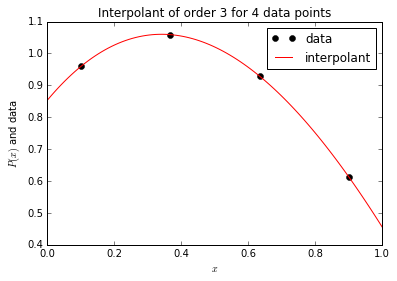

In [8]:
N = 4
N_p = 3
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
# numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

Success!


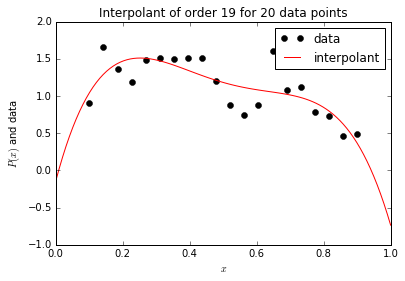

In [9]:
N = 20
N_p = 4
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

## Question 4 - Eigenvalues

**(a)** (12 points) Let $A$ be a $10 \times 10$ random matrix with entries from the normal distribution $R$, minus twice the identity
$$
    A = R - 2 I.
$$  
Write a function that plots $||e^{tA}||_2$ against $t$ for $0 \leq t \leq 20$ on a semilogy plot and compare it to the straight line $e^{t \alpha(A)}$ where $\alpha(A)$ is the spectral abscissa of $A$ defined as
$$
    \alpha(A) = \max_j \text{real}(\lambda_j).
$$
You can use the functions `numpy.eigvals`.

eigenvalue is:
(3.18083104771+0j)


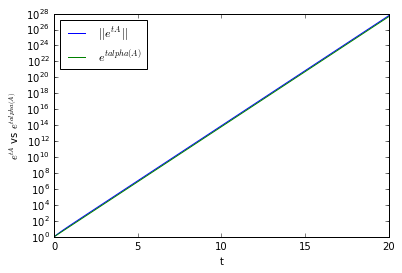

eigenvalue is:
(2.34103297834+0j)


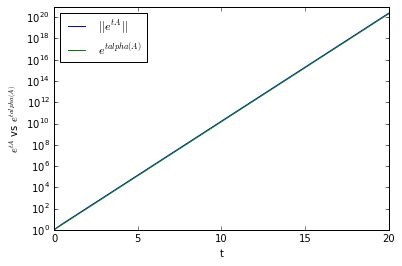

eigenvalue is:
(0.943551079477+0j)


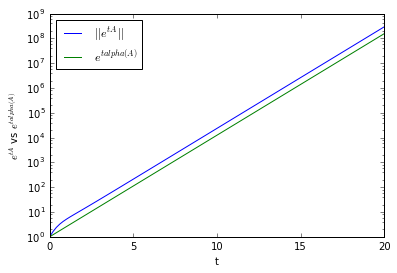

eigenvalue is:
(-0.271954672501+0j)


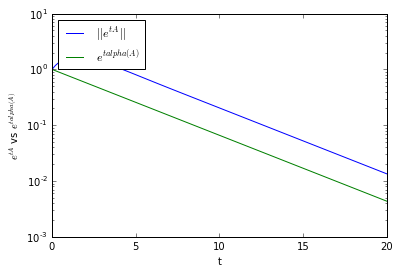

eigenvalue is:
(1.45327265381+0j)


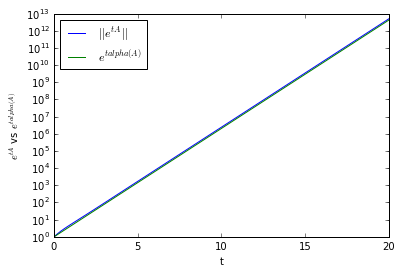

eigenvalue is:
(-0.0305203420222+0j)


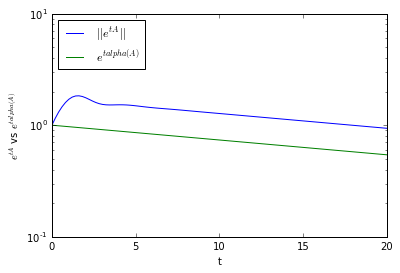

eigenvalue is:
(0.83973495743+0j)


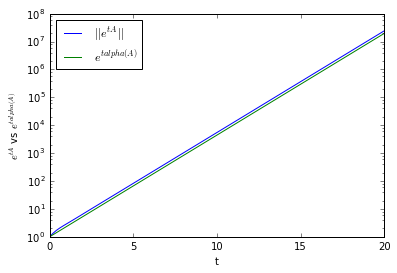

eigenvalue is:
(0.71891413342+0.691652342871j)


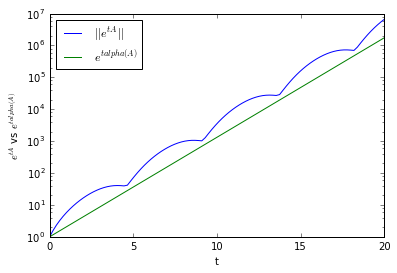

eigenvalue is:
(0.228255832563+0.441765666348j)


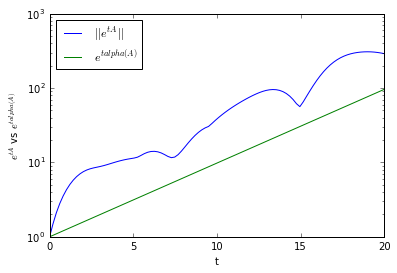

eigenvalue is:
(1.08947440704+0j)


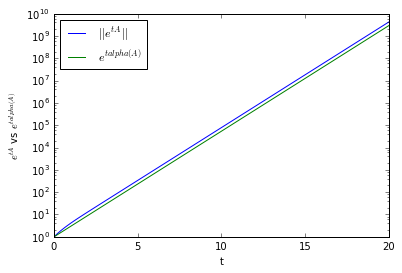

In [10]:
### INSERT CODE HERE
import scipy.linalg
#calculate ||e^tA||
def e_tA(R): 
    """Calculate the 2nd order norm of e^ta
    
    Input:
    -R: the 10*10 normal distribution matrix
    
    Output:
    -e_list: the results of ||e^tA||_2 against t
    """
    I = numpy.identity(10)
    A = R - 2*I
    t = numpy.linspace(0, 20, 100)
    
    e_list = []
    for i in t:
        e_tA = scipy.linalg.expm(i*A)
        e_norm = numpy.linalg.norm(e_tA, ord = 2)
        e_list.append(e_norm)
   
    eigenvalues = numpy.linalg.eigvals(A)
    print "eigenvalue is:"
    print max(eigenvalues)
    return e_list

#calcualte e^taplhaA
def e_alpha(R):
    """Calculate the 2nd order norm of e^ta
    
    Input:
    -R: the 10*10 normal distribution matrix
    
    Output:
    -e_alpha_list: the results of ||e^tA||_2 against t
    """
    I = numpy.identity(10)
    A = R - 2*I
    t = numpy.linspace(0, 20, 100)
    eigenvalues = numpy.linalg.eigvals(A)
    alpha_A = max(numpy.real(eigenvalues))
    e_alpha_list = numpy.exp(t*alpha_A)
    return e_alpha_list

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
mu, sigma = 0, 1.0  # mean and standard deviation
R = numpy.random.normal(mu, sigma, size=(10, 10))
t = numpy.linspace(0, 20, 100)
axes.semilogy(t, e_tA(R), label="$||e^{tA}||$")
axes.semilogy(t, e_alpha(R), label="$e^{talpha(A)}$")
axes.set_xlabel("t")
axes.set_ylabel("$e^{tA}$ vs $e^{talpha(A)}$")
axes.legend(loc=2)
plt.show()

**(b)** (5 points) Try this with ten different matrices and comment on the results.  What property of a matrix leads to a $||e^{tA}||_2$ curve that remains oscillatory at $t \rightarrow \infty$?

**Answer**

As we can see from the graphs, overall, it's close to the straight line $e^{t\alpha(A)}$. That's because they share the same real part, which indicates their slope. However, the $||e^{tA}||_2$ will oscillate when complex part of the eigenvalue exists. That's because the complex part can be represented by $sine$ and $cosine$, which causes the oscillation. When the complex part of the eigenvalue is 0j, there is no oscillation (sometimes, but seldom, oscillate a little bit may due the finite accuracy of the computer). And, the bigger the complex part is, the higher the frequency of the oscillation is.

**End**